<a href="https://colab.research.google.com/github/skandanyal/Machine-Learning-course/blob/main/Projects/California_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California House Price Prediction

In this project, we use the popular California Housing dataset to conduct a basic machine learning project. The main objective of the project is to learn building a basic regression project form scratch.

We go from transforming the data to make each relevant feature resemble a bell curve, to evaluating how some of the well known models work with this data.

In [ ]:
# overview -
# importing the standard libraries and required data
# transforming the data to resemble a bell curve
# graphs, grapgs, and more graphs
# correlation matrix
# machine learning part

## Importing standard libraries and required data

In [ ]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
sns.set_context("notebook")

In [ ]:
# importing the California Housing dataset

from sklearn.datasets import fetch_california_housing

thing = fetch_california_housing()
thing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
# dataset information

print(thing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# load the feature data into a dataframe

X = pd.DataFrame(thing['data'], columns=thing['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


So everything except HouseAge and Population, contain decimal values. Of couse, half a person cannot be legally living inside a house.

In [ ]:
# load the target data into another dataframe

y = pd.DataFrame(thing['target'], columns=thing['target_names'])
y.head()

# in hundreds of thousands of dollars

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Let us look at the variables in our dataframes

In [ ]:
# check out the presence of any null values

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
# check out the presence of any null values

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


So no null values indeed.

In [ ]:
# check out the central tendencies in the X df

X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# check out the central tendencies in the y df

y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


The information of a few features are mentioned in the documentation -

    The target variable is the median house value for California districts,expressed in hundreds of thousands of dollars ($100,000).

    This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.

    Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

    A household is a group of people residing within a home.   
     
    Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

since there are no categorical data in this dataset, no point of trying to count the values.

In [ ]:
# check out the features present in the X df

X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

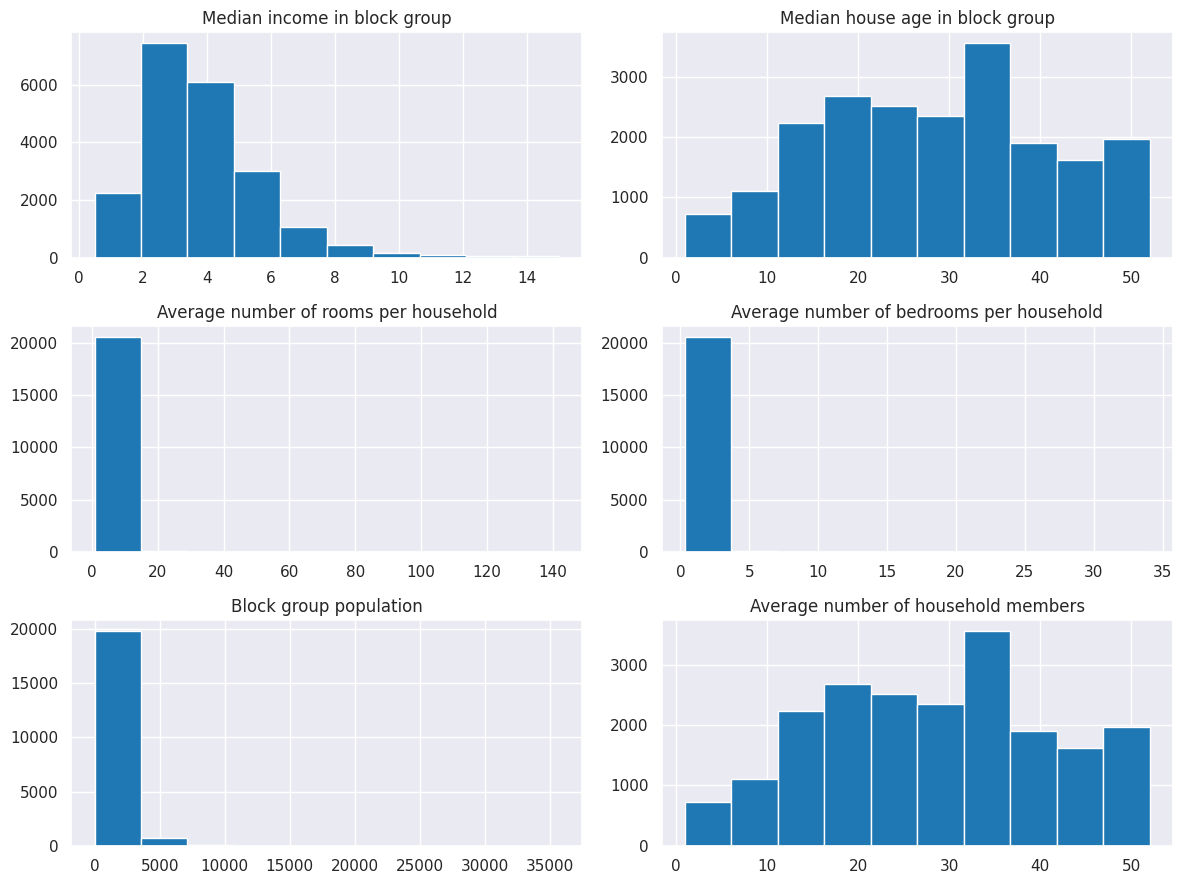

In [ ]:
# first view of the data present, excluding the coordinates

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,9))

ax1.hist(X['MedInc'])
ax1.set_title('Median income in block group')

ax2.hist(X['HouseAge'])
ax2.set_title('Median house age in block group')

ax3.hist(X['AveRooms'])
ax3.set_title('Average number of rooms per household')

ax4.hist(X['AveBedrms'])
ax4.set_title('Average number of bedrooms per household')

ax5.hist(X['Population'])
ax5.set_title('Block group population')

ax6.hist(X['HouseAge'])
ax6.set_title('Average number of household members')

plt.tight_layout()
plt.show()

## Transforming the data to resemble a bell curve.

In [ ]:
# we will transform the features to help us  extract meaningful information

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X['AveRooms_t'] = pt.fit_transform(X[['AveRooms']])

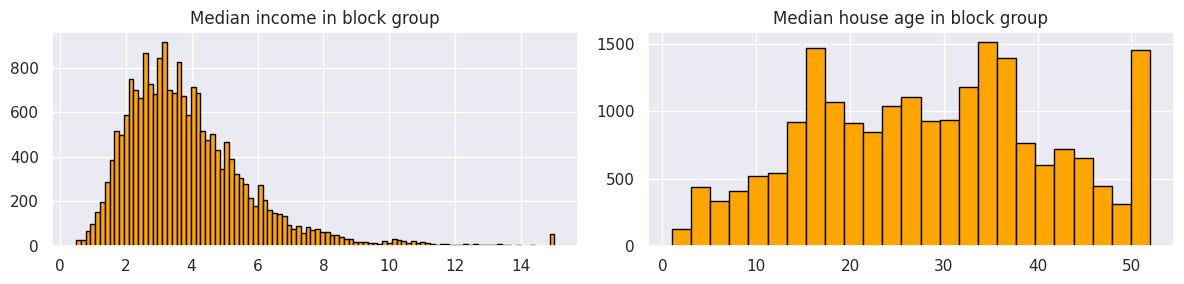

In [ ]:
# plotting the data after transforming it to resemble a bell curve

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1.hist(X['MedInc'], bins=100, color='orange', edgecolor='black')
ax1.set_title('Median income in block group')

ax2.hist(X['HouseAge'], bins=25, color='orange', edgecolor='black')
ax2.set_title('Median house age in block group')

plt.tight_layout()
plt.show()

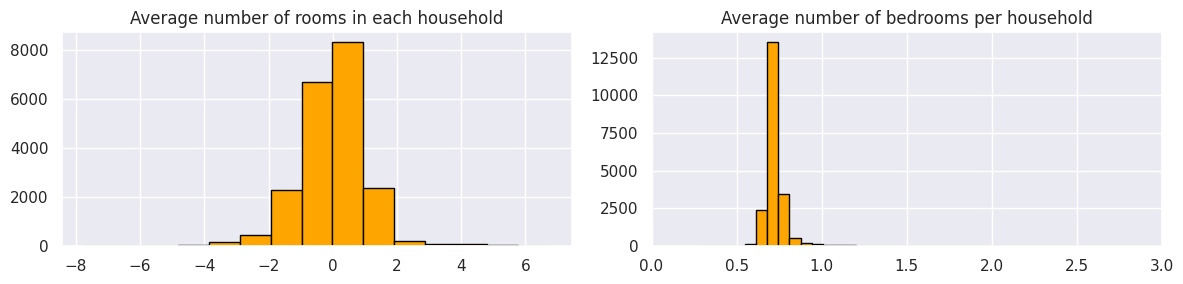

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax3.hist(X['AveRooms_t'], color='orange', edgecolor='black', bins=15)
ax3.set_title('Average number of rooms in each household')

ax4.hist(np.log(X['AveBedrms'] + 1),bins=50, color='orange', edgecolor='black')
ax4.set_xlim(0,3)
ax4.set_title('Average number of bedrooms per household')

plt.tight_layout()
plt.show()

In [ ]:
X['AveBedrms'] = np.log(X['AveBedrms'] + 1)

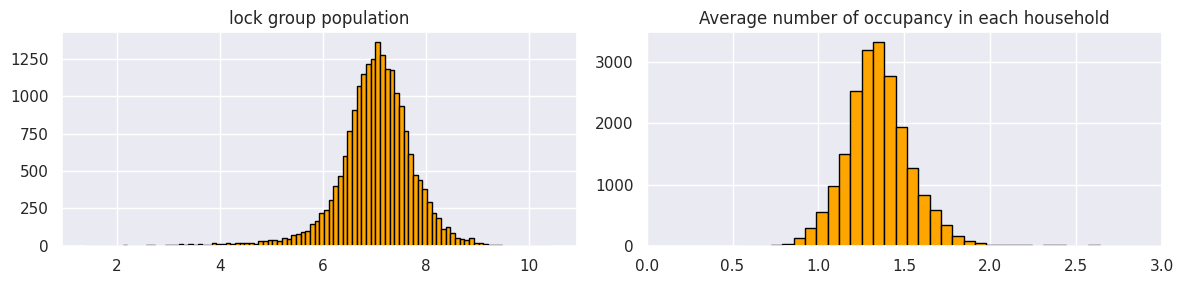

In [ ]:
fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax5.hist(np.log(X['Population'] + 1), bins=100, color='orange', edgecolor='black')
# ax5.set_xlim(0,10000)
ax5.set_title('lock group population')

ax6.hist(np.log(X['AveOccup'] + 1), bins=100, color='orange', edgecolor='black')
ax6.set_xlim(0,3)
ax6.set_title('Average number of occupancy in each household')

plt.tight_layout()
plt.show()

In [ ]:
# reassigning the transformed values to the original columns

X['Population'] = np.log(X['Population'] + 1)
X['AveOccup'] = np.log(X['AveOccup'] + 1)

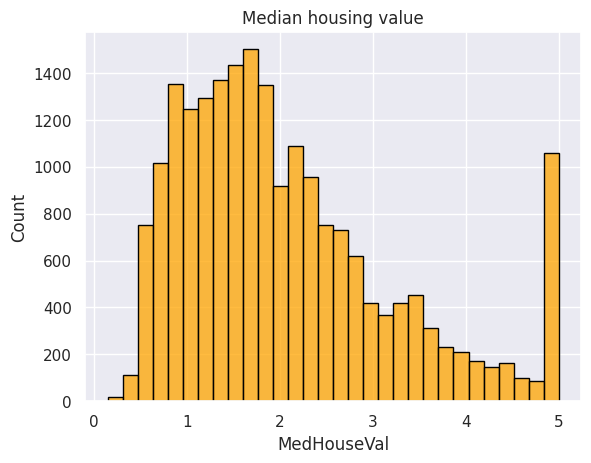

In [ ]:
# let us look at the target values. We will not transform it in any way, so to not alter the results

sns.histplot(
    data = y,
    x='MedHouseVal',
    bins=30,
    color='orange',
    edgecolor='black',
)
# plt.grid()
plt.title('Median housing value')
plt.show()

## Graphs to figure out how house prices and income is distributed across the state.

In [ ]:
# plotting latitude and longitude vs target, by creating a new dataframe

bins = [0, 1.5, 2.5, 3.5, 4.5, y['MedHouseVal'].max()]
labels = ['<1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5+']

# geo_df will contain the data for an upcoming plot

geo_df = pd.DataFrame({
    'Latitude': X['Latitude'],
    'Longitude': X['Longitude'],
    'MedHouseVal': y['MedHouseVal'],
})

geo_df['ValRange'] = pd.cut(y['MedHouseVal'], bins=bins, labels=labels)

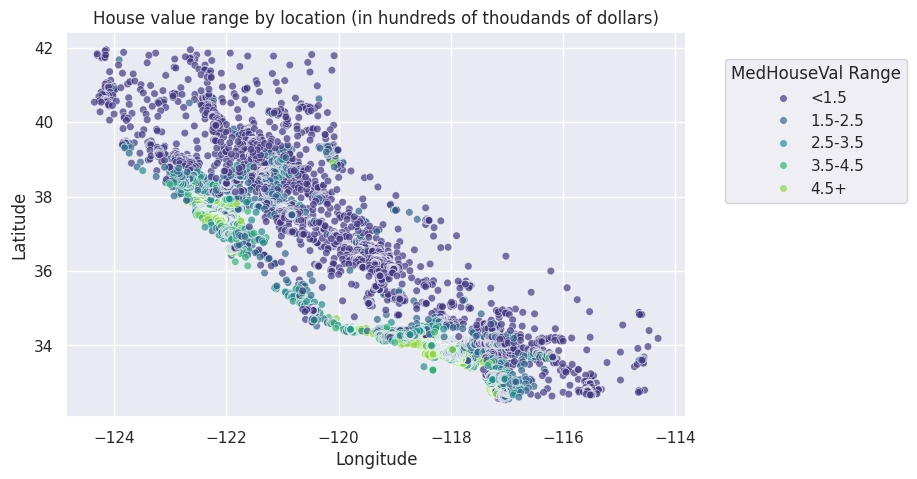

In [ ]:
# plotting the median price of a house throughout the state

plt.figure(figsize=(8,5))

sns.set_style('darkgrid')

sns.scatterplot(
    data=geo_df,
    x='Longitude', y='Latitude',
    hue='ValRange',
    palette='viridis',
    s=30,
    alpha=0.7,
)

plt.legend(
    title='MedHouseVal Range',
    bbox_to_anchor=(1.05,0.95),
    loc="upper left"
)

plt.title("House value range by location (in hundreds of thoudands of dollars)")
plt.show()

In [ ]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'AveRooms_t'],
      dtype='object')

In [ ]:
geo_df.columns

Index(['Latitude', 'Longitude', 'MedHouseVal', 'ValRange'], dtype='object')

In [ ]:
# tranforming the geo_df dataframe for another plot further

geo_df.drop(['MedHouseVal', 'ValRange'], axis=1, inplace=True)
geo_df['MedInc'] = X['MedInc'].copy()
geo_df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


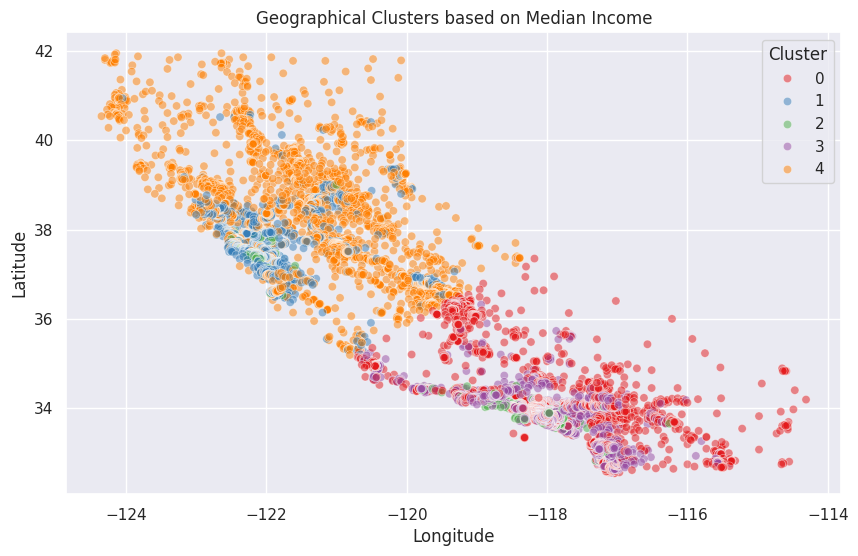

In [ ]:
# clustering the sstate based on median income

from sklearn.cluster import KMeans

# geo_df['MedInc'] = X['MedInc'].copy()

kmeans = KMeans(n_clusters=5, random_state=5)
geo_df['Cluster'] = kmeans.fit_predict(geo_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=geo_df,
    x='Longitude', y='Latitude',
    hue='Cluster',
    palette='Set1',
    alpha=0.5
)
plt.title("Geographical Clusters based on Median Income")
plt.show()

## Correlation matrix to identiy multicollinearity in the data

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.111580   -0.005046 -0.029490   
HouseAge   -0.119034  1.000000 -0.153277  -0.124147   -0.244264 -0.007349   
AveRooms    0.326895 -0.153277  1.000000   0.724990   -0.166164 -0.030050   
AveBedrms  -0.111580 -0.124147  0.724990   1.000000   -0.176666 -0.097792   
Population -0.005046 -0.244264 -0.166164  -0.176666    1.000000  0.195788   
AveOccup   -0.029490 -0.007349 -0.030050  -0.097792    0.195788  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.087037   -0.136460 -0.133243   
Longitude  -0.015176 -0.108197 -0.027540   0.021299    0.109029  0.145265   
AveRooms_t  0.570226 -0.215656  0.715105   0.398476   -0.101704 -0.020392   

            Latitude  Longitude  AveRooms_t  
MedInc     -0.079809  -0.015176    0.570226  
HouseAge    0.011173  -0.108197   -0.215656  
AveRooms    0.106389  -0.027540    0.715105  
AveBedrms   0.087037   0.021299    0.398476  

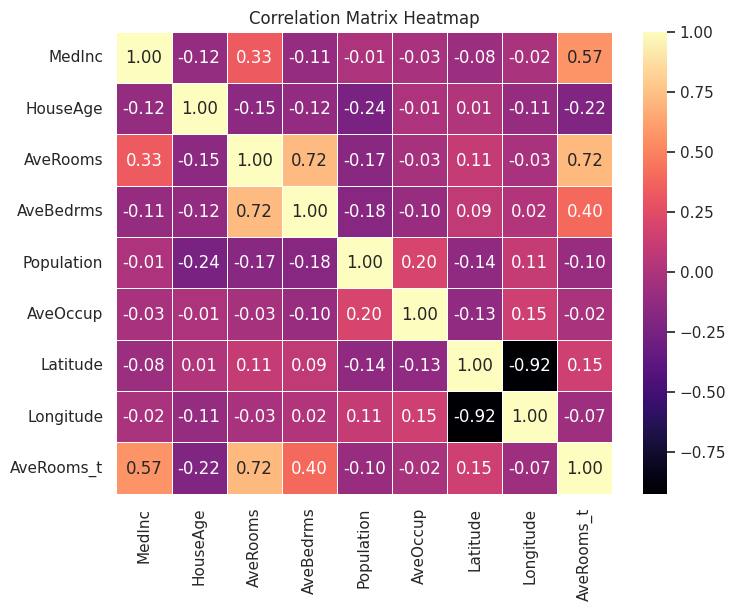

In [ ]:
# check for correlation matrix

# calculating correlation matrix
corr_matrix = X.corr(numeric_only=True)
print(corr_matrix)  # View correlation values

# Set the background style to white
sns.set_style('white')
sns.palette='viridis'

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

We observe that there aren't any major multicollinearity in the feature data, except for latitudes and longitudes which we won't transform.

In [ ]:
# dropping a feaure which wasn't dropped/reassigned before

X.drop('AveRooms', axis=1, inplace=True)
X.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,AveRooms_t
0,8.3252,41.0,0.704982,5.777652,1.268511,37.88,-122.23,1.106394
1,8.3014,21.0,0.678988,7.784057,1.134572,37.86,-122.22,0.712367
2,7.2574,52.0,0.729212,6.208590,1.335596,37.85,-122.24,1.673645
3,5.6431,52.0,0.729025,6.326149,1.266369,37.85,-122.25,0.461045
4,3.8462,52.0,0.732888,6.338594,1.157342,37.85,-122.25,0.737176


In [ ]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Finally, the machine learning part

In [ ]:
# importing several models to test for the best fit

from sklearn import linear_model                                                # linear regression
from sklearn import svm                                                         # support vector regressor
from sklearn.ensemble import RandomForestRegressor                              # random forest regressor
from sklearn.ensemble import HistGradientBoostingRegressor                      # gradient boosting regressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'Ridge Regression': make_pipeline(StandardScaler(), linear_model.Ridge(alpha=.5)),
    'SVR': make_pipeline(StandardScaler(), svm.SVR()),
    'Random Forest': RandomForestRegressor(random_state=5, n_jobs=-1),
    'Gradient Boosting Regressor': HistGradientBoostingRegressor(random_state=5),
    'Linear Regression': linear_model.LinearRegression(fit_intercept=True, n_jobs=-1)
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X, y=y, scoring='r2', cv=5, n_jobs=5)
    print(f"{name} -> Mean accuracy: {np.mean(scores):.4f}")

Ridge Regression -> Mean accuracy: 0.6100
SVR -> Mean accuracy: 0.6973
Random Forest -> Mean accuracy: 0.6472
Gradient Boosting Regressor -> Mean accuracy: 0.6861
Linear Regression -> Mean accuracy: 0.6100


The model with the highest score is a Support Vector Machine, with R2 score nearing 0.7

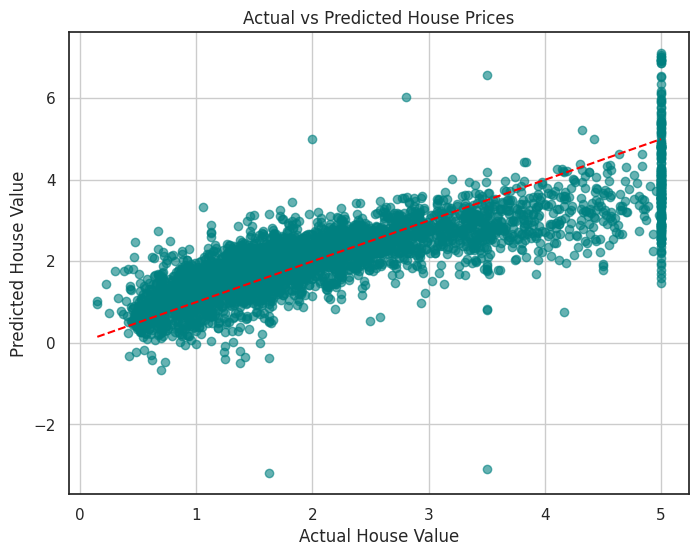

In [ ]:
# training the best model available

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = linear_model.LinearRegression(fit_intercept=True, n_jobs=-1, )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test  .min(), y_test.max()], '--r')  # ideal line
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

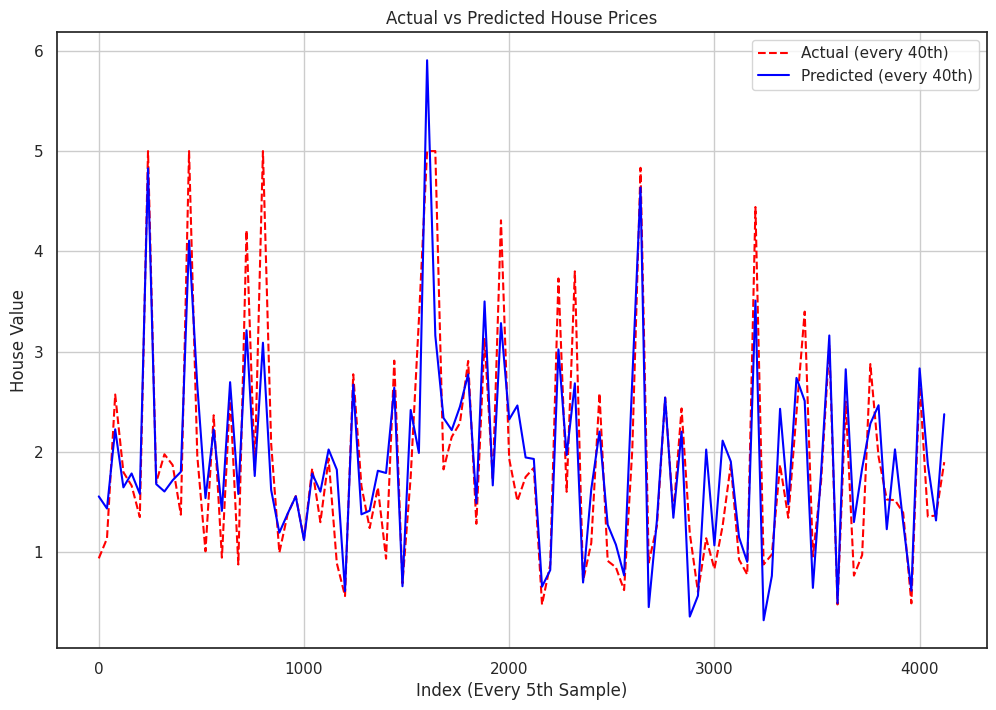

In [ ]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = linear_model.LinearRegression(fit_intercept=True, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Convert y_test and y_pred to Series (in case they’re arrays)
y_test = pd.Series(y_test.values.ravel()).reset_index(drop=True)
y_pred = pd.Series(y_pred.ravel()).reset_index(drop=True)

# Take every 5th sample
indices = np.arange(0, len(y_test), 40)
actual_line = y_test.iloc[indices]
predicted_line = y_pred.iloc[indices]

# Plot
plt.figure(figsize=(12, 8))
# plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label='Predicted vs Actual')

# Plot sampled trend lines
plt.plot(indices, actual_line, 'r--', label='Actual (every 40th)')
plt.plot(indices, predicted_line, 'b', label='Predicted (every 40th)')

plt.xlabel("Index (Every 5th Sample)")
plt.ylabel("House Value")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

We observe that the model predicts the median house prices pretty accurately at lower and mid-range values. But as the house price increases, we see a divergence in the predicted price.    
This can be overcame by further tuning of model and transformation of the data.

In [ ]:
# R_squared score

print("R² score:", r2_score(y_test, y_pred))

R² score: 0.6547988559792275


## Conclusion:
We see that the Support Vector Regression model scored 0.69 in the R_squared test, which was the highest score among the four models which we tested . Considering high variability in a real estate dataset, an R_2 score of nearly 0.7 is considered good enough.      
With further tuning, the SVR model stands as a viable option for predicting the median house price using relevant input features to achieve accurate results.